In [1]:
import pandas as pd

In [28]:
df = pd.read_csv('bank-additional-full.csv')
df.shape

(41188, 21)

In [20]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [4]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [5]:
print('Số dòng "unknown": trong bộ dữ liệu: ',df[df.isin(['unknown']).any(axis=1)].shape[0])

unknown = df.loc[:,'job':'loan'].eq('unknown').mean() * 100
print('Phần trăm số dòng "unknown" trong các cột:\n',unknown)

Số dòng "unknown": trong bộ dữ liệu:  10698
Phần trăm số dòng "unknown" trong các cột:
 job           0.801438
marital       0.194288
education     4.201477
default      20.876239
housing       2.404313
loan          2.404313
dtype: float64


Để phục vụ mục tiêu phân tích, ta sẽ loại bỏ các giá trị `unknown` không chứa thông tin phân loại.

In [8]:
data = df[(~df.loc[:,'job':'loan'].isin(['unknown'])).all(1)]
data.loc[:,'job':'loan'].eq('unknown').mean() * 100

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
dtype: float64

<h2>Chiến lược khai thác dữ liệu sẽ chia dữ liệu khách hàng thành 2 nhóm:</h2><br>

<b>Khách hàng đã tham gia nhiều lần</b>: có các đặc điểm về số lần liên lạc trong mỗi chiến dịch, và kết quả của chiến dịch trước.<br>Từ đó có thể nội suy ra số lần liên lạc tối ưu kết hợp kết quả nào của chiến dịch trước (`success`hay`failure`) có mức độ ảnh hưởng đến tỷ lệ chuyển đổi trong chiến dịch này. Ngoài ra có thể theo dõi tỷ lệ giữ chân những khách hàng đã tham gia thành công ở chiến dịch trước có còn tiếp tục đăng ký gửi tiền ở chiến dịch này hay không<br>
<b>Khách hàng mới tham gia lần đầu</b>: có các đặc điểm về độ dài cuộc gọi, số ngày kể từ lần cuối liên lạc, ngày trong tuần và tháng trong năm.<br>Từ đó có thể nội suy ra thời gian và thời điểm liên lạc tối ưu nhất cho tỷ lệ chuyển đổi cao, cũng như tính được tỷ lệ rời bỏ của khách hàng kể từ lần cuối liên lạc</b>

In [10]:
none = data['poutcome'].value_counts(normalize=True)
print('Khách hàng mới chiếm %.2f%% trong bộ dữ liệu' % (none.nonexistent*100))

Khách hàng mới chiếm 84.74% trong bộ dữ liệu


Do khách hàng đã tham gia chiến dịch trước chỉ chiếm phần nhỏ trong bộ dữ liệu (~15%) sẽ cho phản ánh kết quả không đại diện được cho toàn bộ tập khách hàng, nên ta sẽ bỏ qua chiến lược chia khách hàng thành 2 nhóm như trên và tập trung phân cụm dựa trên các đặc điểm khác về nghề nghiệp, hôn nhân, học vấn...

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

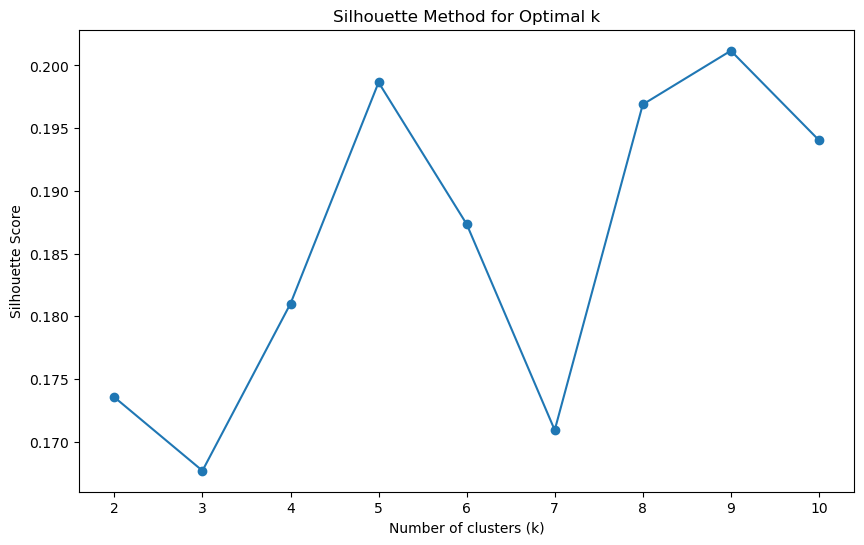

In [12]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

encoder = OneHotEncoder(sparse=False)
# Encode các biến phân loại
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Khảo sát k từ 2 tới 10 để tìm số cụm tối ưu
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_categorical)
    score = silhouette_score(encoded_categorical, kmeans.labels_)
    silhouette_scores.append(score)

# Vẽ đồ thị Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [13]:
# Chọn k có silhouette scores lớn nhất
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Áp dụng K-means với k=7 vào bộ dữ liệu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(encoded_categorical)
data['cluster'] = clusters

# Phân tích đặc điểm của mỗi cụm
cluster_summary = data.groupby('cluster').agg({
    'age': ['count'],
    'job': lambda x: x.value_counts().idxmax(),
    'marital': lambda x: x.value_counts().idxmax(),
    'education': lambda x: x.value_counts().idxmax(),
    'default': lambda x: x.value_counts().idxmax(),
    'housing': lambda x: x.value_counts().idxmax(),
    'loan': lambda x: x.value_counts().idxmax(),
    'y': lambda x: round((x == 'yes').mean()*100,2)
}).reset_index()

# Hiển thị các cụm
cluster_summary.columns = ['cluster', 'size', 'common_job', 'common_marital_status', 'common_education', 'common_default', 'common_housing', 'common_loan', 'conversion_rate(%)']
cluster_summary.sort_values(by=['conversion_rate(%)'], ascending=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\daova\AppData\Local\Temp\ipykernel_3704\4031646421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


,cluster,size,common_job,common_marital_status,common_education,common_default,common_housing,common_loan,conversion_rate(%)
7,7,2390,admin.,single,university.degree,no,yes,no,16.07
2,2,4664,admin.,married,university.degree,no,no,no,14.92
6,6,2966,admin.,married,university.degree,no,yes,no,13.96
1,1,3108,admin.,single,high.school,no,no,no,12.36
5,5,3369,admin.,married,high.school,no,yes,no,12.32
4,4,3175,technician,married,professional.course,no,yes,no,12.25
0,0,2638,admin.,married,high.school,no,yes,yes,12.21
3,3,3504,blue-collar,married,basic.9y,no,yes,no,10.56
8,8,4664,blue-collar,married,high.school,no,no,no,10.38


In [16]:
mean_cvr = cluster_summary.iloc[:,-1].mean()
print('Tỷ lệ chuyển đổi trung bình: %.2f%%' % mean_cvr)

Tỷ lệ chuyển đổi trung bình: 12.78%


In [ ]:
cleaned_file_path = 'bank-additional-cluster.csv'
data.to_csv(cleaned_file_path, index=False)